## Fundamental Concept Review: Classification vs. Regression

Many people new to machine learning start doing some research and quickly ask one of the most important fundamental questions to understand about supervised learning problems:

### *What's the difference between classification and regression?*

The first answer google provides (for me, anyway) comes from [math.stackexchange](https://math.stackexchange.com/questions/141381/regression-vs-classification) and it answers succinctly:

    Regression: the output variable takes continuous values.
    Classification: the output variable takes class labels.
    
Great! We're done. Shortest block post ever!

**Just kidding.**

While that stackexchange answer is indeed true, and is indeed generally a sufficient explanation for someone in perhaps a managerial or executive role, it is most definitely _insufficient_ for someone working closey with machine learning.

It turns out, both regression and classification problems end up computing continuous values. Why then can't we take a regression problem, slap a threshold on the output (i.e. all predictions above 50 are labeled "1" and all predictions below 50 are labeled "0"), and call it a classification problem? **Regression problems and classification problems are _fundamentally different_ beasts.** Regression problems are predicting a continuous value, while classification problems are predicting the class to which a point belongs.

### Minimizing Cost Functions
Both regression and classification algorithms are at their core minimizing a cost function, $J$. They do this by taking some training data, forming a hypothesized prediction prediction ($h_\theta$, where $\theta$ represents the parameters that define the model) for each point, and determining how wrong that prediction is by comparing it to a true label, $y$. How wrong the prediction was is called the **cost**. 

Take for example the case of basic linear regression: the cost is the summed squared difference between $h_\theta$ and $y$ for all $m$ training points. 

![Cost Function for linear regression.](images/linreg_cost.png)

The model tries one set of parameters $\theta$, computes the cost, then tries another set of parameters, computes the cost, and continues until it finds the set of parameters that result in the smallest cost (algorithms generally do this parameter tuning in a smart way, often via [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)).

### Regression vs. Classification
Now we can start talking about regression vs. classification problems. For a quick clarification, here we talk about _binary_ classification problems, where the label $y$ can be only 0 or 1 ([multi-class classification](https://en.wikipedia.org/wiki/Multiclass_classification) problems are binary classification problems at their core). 

In a regression problem, the hypothesis $h_\theta$ can be _any real valued number_, from negative infinity to infinity. The labels, $y$ are similarly real valued. The cost function is just comparing $h_\theta$ to $y$ in some way (i.e. squared difference). 

In a classification problem, the hypothesis is still real valued, but _forced to be between 0 and 1_. It's generally forced this way by passing a fully real-valued hypothesis through a [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function). What about the cost function for a binary classification problem?

__**The cost function for a classification problem changes depending on the true label.**__

This is the fundamental difference between regression and binary classification problems. In a binary classification problem, the cost function when the label is 1 is something like $-log(h_\theta)$ while when the label is 0 it's something like $-log(1-h_\theta)$. That is, if the true label $y$ is 1, the cost is zero (good!) if the prediction, $h_\theta$ is 1. However, the cost goes to infinity the farther from 1 (closer to zero) $h_\theta$ is! The opposite is true if the true label $y$ is 0. **This is what constitutes the fundamental difference between regression and classification problems.**

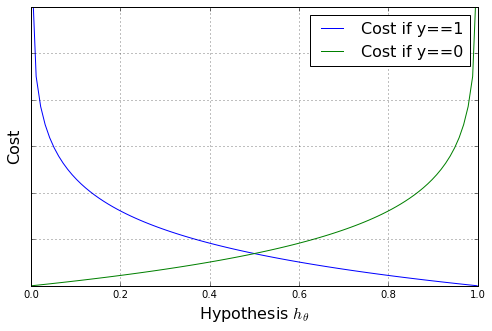

In [1]:
#ignore
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
myx = np.linspace(0.001,0.999,100)
myy1 = -np.log(myx)
myy2 = -np.log(1-myx)
kazu = plt.plot(myx,myy1,'-',label='Cost if y==1')
kazu = plt.plot(myx,myy2,'-',label='Cost if y==0')
kazu = plt.xlabel('Hypothesis $h_{\\theta}$',fontsize=16)
kazu = plt.ylabel('Cost',fontsize=16)
kazu = plt.legend(loc='best',fontsize=16)
kazu = plt.ylim(0,6)
kazu = plt.grid(True)
frame1 = plt.gca()
kazu = frame1.axes.yaxis.set_ticklabels([])
kazu = plt.savefig('images/classification_cost.png')

![Cost function for binary classification.](images/classification_cost.png)

In summary, regression and binary classification problems are fundamentally different. Regression problems output continuous hypotheses, and classification problems output discrete ones. More subtly, the cost minimization is performed differently between a regression and a classification problem, so a classification problem is _not_ just a regression problem with a threshold applied on the outputs!